# ตัวอย่างการใช้ `pandas`

Example : Blog gender dataset

เราต้องการเตรียมข้อมูลสำหรับการสร้างเครื่องแยกแยะว่า Blog post นั้นเขียนโดยผู้เขียนที่เป็นผู้ชายหรือผู้หญิง

In [36]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split

blog_data = pd.read_csv('https://attapol.github.io/programming/data/blog-gender-dataset.csv', 
                  names=['blog_post', 'gender'])
blog_data['length'] = blog_data['blog_post'].apply(str).apply(len)
blog_data = blog_data[blog_data['length'] > 80]
blog_data['tokenized_text'] = blog_data['blog_post'].apply(lambda x: '|'.join(nltk.word_tokenize(str(x))))
blog_data['label'] = blog_data['gender'].apply(lambda x: x.upper().strip())

blog_data = blog_data[['label', 'tokenized_text']]
train, the_rest = train_test_split(blog_data, test_size=0.4)
dev, test = train_test_split(the_rest, test_size=0.5)

train.to_csv('train-blog-gender-dataset.csv', index=False)
dev.to_csv('dev-blog-gender-dataset.csv', index=False)
test.to_csv('test-blog-gender-dataset.csv', index=False)

## 1. Load and clean raw data

In [ ]:
!curl -O https://attapol.github.io/programming/data/blog-gender-dataset.csv

In [25]:
import pandas as pd
data = pd.read_csv('https://attapol.github.io/programming/data/blog-gender-dataset.csv', 
                  names=['blog_post', 'gender'])
data.head(10)

,blog_post,gender
0,Long time no see. Like always I was rewriting...,M
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M
2,Who moved my Cheese??? The world has been de...,M
3,Yesterday I attended a biweekly meeting of an...,M
4,Liam is nothing like Natalie. Natalie never w...,F
5,"In the EU we have browser choice, but few know...",M
6,Hmmm.. I really didn't wanna update my blog ti...,F
7,happy teachers day..!! who is celebrating..??\...,M
8,We watch movies. And we see what the camera in...,F
9,Cooking! May be the title of the blog is a gi...,F


ใส่ชื่อคอลัมน์ให้เรียบร้อย

In [16]:
data = pd.read_csv('blog-gender-dataset.csv', names=['text','gender'])
data.head()

,text,gender
0,Long time no see. Like always I was rewriting...,M
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M
2,Who moved my Cheese??? The world has been de...,M
3,Yesterday I attended a biweekly meeting of an...,M
4,Liam is nothing like Natalie. Natalie never w...,F


### ตรวจสอบความถูกต้องของข้อมูล

ลองสุ่มขึ้นมาดูเรื่อย ๆ ว่ามีอะไรผิดปกติมั้ย

In [19]:
data.sample(n=1)['text'].to_list()

["Ahem!This hereby serves as a final reminder that I've moved my blog to my new website, johnsellers.com. Please update your links -- if you even bothered to bookmark this nonsense in the first place, that is.Also, this hereby serves as yet another excuse for me to publish a video of a monkey riding a bicycle. After five years and 454 posts, I am hereby and forevermore moving this blog over to the much-simpler-for-me johnsellers.com.Please update your links.This is your new RSS feed.Enjoy the silence.WHY I'M ANGRY TODAYHoagie crumbs stuck in my sweater! Here's the interview I did with John Cleese.WHY I'M ANGRY TODAYWhy is Chase Bank messing with me? They be frontin'! I am interviewing Lost's Jorge Garcia today, who it turns out has a pretty sweet blog called Dispatches from the Island. Here's my favorite post.In the next few days, I'm going to post a list of the top ten little things that annoyed me this year. And in the next few weeks, I'm going to be moving this blog over to johnsell

ดูความยาวเฉลี่ยของข้อความดูว่ามันอยู่ช่วงที่โอเคมั้ย

(ให้สังเกตวิธีการเพิ่ม คอลัมน์ใหม่ให้กับ `DataFrame`)

In [20]:
data.shape

(3232, 2)

In [22]:
text_list = data['text'].to_list()
text_lengths = [len(str(x)) for x in text_list]
# แบบสั้นๆ 
text_lengths = data['text'].apply(str).apply(len)
print(len(text_lengths))
print(len(data))

3232
3232


In [23]:
data['text length'] = text_lengths

In [24]:
data.head()

,text,gender,text length
0,Long time no see. Like always I was rewriting...,M,954
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M,1877
2,Who moved my Cheese??? The world has been de...,M,5983
3,Yesterday I attended a biweekly meeting of an...,M,1132
4,Liam is nothing like Natalie. Natalie never w...,F,1139


In [26]:
data['text length'].describe()

count     3232.000000
mean      2343.352104
std       4579.572823
min          3.000000
25%        570.000000
50%       1049.000000
75%       1879.250000
max      32714.000000
Name: text length, dtype: float64

In [27]:
data['text length'].sum()

7573714

เอ ทำไมบางข้อความมันสั้นจัง ลองลงไปตรวจหน่อย

(สังเกตวิธีการเลือกแค่บางแถว)

In [30]:
is_too_short = data['text length'] < 100
data[is_too_short]

,text,gender,text length
142,NaN,NaN,3
999,NaN,NaN,3
1010,NaN,NaN,3
1024,NaN,NaN,3
1471,NaN,NaN,3
1521,NaN,M,3
1728,i love these vitamins when they were from AARP...,M,85


สร้าง `DataFrame` ขึ้นมาใหม่ที่สะอาดกว่าเดิม

In [31]:
new_data = data[data['text length'] > 80]
print(new_data.shape)
print(data.shape)

(3226, 3)
(3232, 3)


### เช็คการกระจายตัวของ Label
แปลว่า เช็คว่า label แต่ละขนิดเกิดขึ้นมากน้อยกี่ครั้ง ดูด้วยว่ามี label แปลกปลอมมามั้ย

In [33]:
new_data['gender'].value_counts()

M      1546
F      1390
 F      153
 M      126
m         5
f         4
F         1
 M        1
Name: gender, dtype: int64

เปลี่ยนตัวเล็กให้เป็นตัวใหญ่ และเอา space หน้าหลังออกให้หมด

เสร็จแล้วสร้างเป็น column ใหม่แยกกันออกมา


In [34]:
new_data['gender'].apply(lambda x: x.upper().strip()).value_counts()

M    1678
F    1548
Name: gender, dtype: int64

In [35]:
new_data['label'] = new_data['gender'].apply(lambda x: x.upper().strip())

/Users/te/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 2. Tokenize, tag, and parse data


In [36]:
!pip install nltk

In [37]:
import nltk
new_data['tokenized_text'] = new_data['text'].apply(lambda x: '|'.join(nltk.word_tokenize(x)))

/Users/te/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
new_data.head()

,text,gender,text length,label,tokenized_text
0,Long time no see. Like always I was rewriting...,M,954,M,Long|time|no|see|.|Like|always|I|was|rewriting...
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M,1877,M,Guest|Demo|:|Eric|Iverson|’|s|Itty|Bitty|Searc...
2,Who moved my Cheese??? The world has been de...,M,5983,M,Who|moved|my|Cheese|?|?|?|The|world|has|been|d...
3,Yesterday I attended a biweekly meeting of an...,M,1132,M,Yesterday|I|attended|a|biweekly|meeting|of|an|...
4,Liam is nothing like Natalie. Natalie never w...,F,1139,F,Liam|is|nothing|like|Natalie|.|Natalie|never|w...


In [40]:
new_data = new_data[['tokenized_text', 'gender']]

## 3. Split the data into train, dev, test sets

Shuffle ข้อมูล 
หาจุดตัดใน data set 

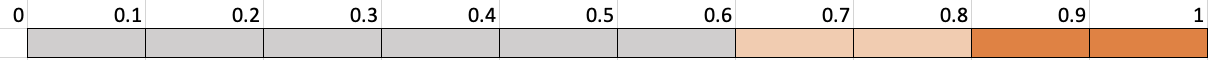

In [43]:
from sklearn.model_selection import train_test_split

train, the_rest = train_test_split(new_data, train_size=0.6)
dev, test = train_test_split(the_rest, test_size=0.5)

In [44]:
print(len(train))
print(len(dev))
print(len(test))

1935
645
646


## 4. Save ใส่ไฟล์

In [ ]:
train.to_csv('train-blog-gender-dataset.csv', index=False)
dev.to_csv('dev-blog-gender-dataset.csv', index=False)
test.to_csv('test-blog-gender-dataset.csv', index=False)

In [ ]:
loaded_data = pd.read_csv('train-blog-gender-dataset.csv')

In [ ]:
loaded_data.head()